In [ ]:
dir = '/Users/robertchen/Documents/facebook_messages/' #PUT YOUR OWN PATH HERE

# Pick out the people and timestamps of all messages

In [1]:
import os
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
data = {}

subdirs = [x[0] for x in os.walk(dir)]
for subdir in subdirs:
    if Path(subdir+'/message.json').is_file():
        with open(subdir+'/message.json', 'r') as f:
            d = json.load(f) #d has stuff that we don't use here, such as the messages themselves, you might want to check out
            if 'participants' in d.keys() and 'messages' in d.keys():
                people_count = len(d['participants'])
                message_count = len(d['messages'])
                for person in d['participants']:
                    if isinstance(person, dict):
                        person = person['name']
                    if person not in data.keys():
                        data[person] = []
                    for message in d['messages']:
                        data[person].append([message['timestamp_ms']/(1000*60*60*24*365.0) + 1970,people_count])

# Now do whatever you want, ex. let's plot moving averages over time

In [3]:
bucket_size = 1.0/365.0

def group_adjust(n):
    return 1.0/(n**2)

num_buckets = int(((2018.51 - 2010.0)/bucket_size) + 1) #need to set bigger than last timestamp & smaller than first respectively
buck_results = {}
for person, info in data.iteritems():
    buck_results[person] = np.zeros(num_buckets)
    for [timestamp, num_people] in info:
        this_bucket = int((timestamp - 2010.0)/bucket_size)
        buck_results[person][this_bucket] += group_adjust(num_people)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:28: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=182,center=False).mean()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:33: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=182,center=False).mean()


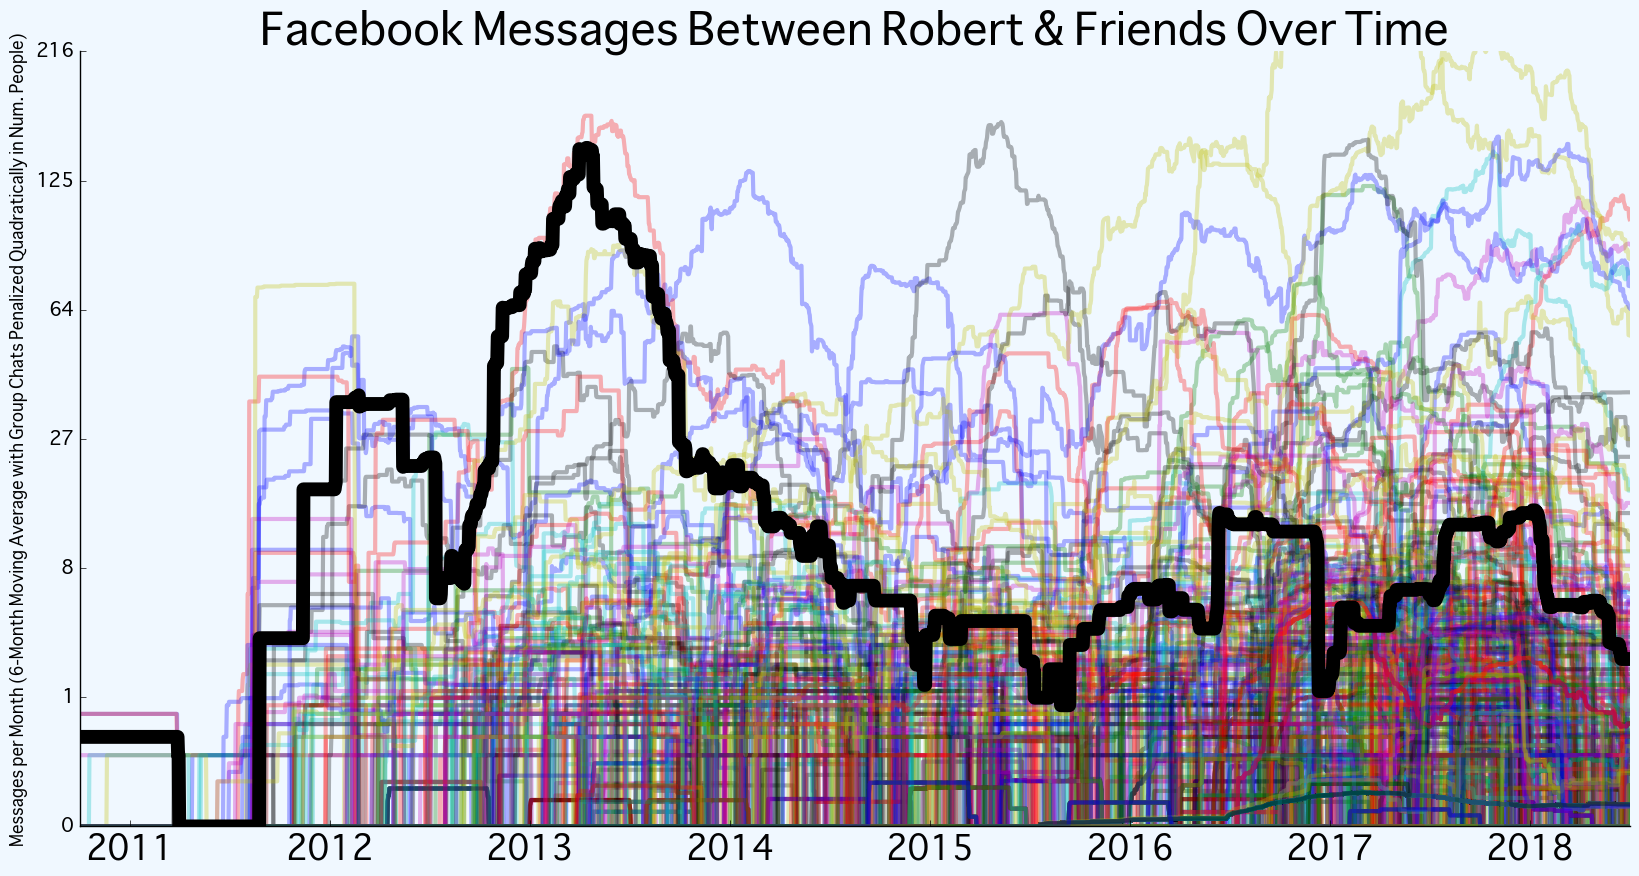

In [5]:
person_highlighted = None #can be None or a person's name as a string, in which case they will be highlighted in the plot

amount_buckets_window = int(0.5 / bucket_size) #measured in num years; you could change this moving average window

fig = plt.figure(figsize=(20,10),facecolor='aliceblue')
ax = fig.add_subplot(111)
ax.set_yticks(range(0,7)) #prob change this
ax.set_yticklabels([str(x**3) for x in range(0,7)],fontsize=14,fontweight='bold',fontname='Sathu') #prob change this; it's optimized for me 
ax.set_xticks(range(2011,2019)) #prob change this; it's optimized for me
ax.set_xticklabels([str(x) for x in range(2011,2019)],fontsize=24,fontweight='bold',fontname='Sathu') #prob change this; it's optimized for me
ax.set_axis_bgcolor("aliceblue")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.ylim(0,6) #prob change this; it's optimized for me
plt.xlim(2010.75,2018.5) #prob change this
plt.ylabel('Messages per Month (6-Month Moving Average with Group Chats Penalized Quadratically in Num. People)',
          fontweight='bold',fontname='Sathu',fontsize=12)
plt.title('Facebook Messages Between Robert & Friends Over Time',fontsize=32,fontname='Sathu',fontweight='bold')
for person in data.keys():
    ax.plot(np.linspace(2010.0,2018.5,num_buckets)[amount_buckets_window:],
             (30*pd.rolling_mean(pd.Series(buck_results[person]),amount_buckets_window)[amount_buckets_window:])**0.33,
             alpha=0.3,linewidth=3.0) #prob change this transformation; it's optimized for me
if person_highlighted is not None:
    plt.plot(np.linspace(2010.0,2018.5,num_buckets)[amount_buckets_window:],
             (30*pd.rolling_mean(pd.Series(buck_results[person_highlighted]),
                                 amount_buckets_window)[amount_buckets_window:])**0.33,
             alpha=1.0,linewidth=10.0,c='k') #prob change this transformation; it's optimized for me